Step 1: Load and Prepare Dataset:

In this step, we load the Wine dataset from the sklearn.datasets library.
We explore the dataset to see the feature names, the number of classes, and the distribution of samples.
Next, we split the dataset into 80% training data and 20% testing data to evaluate the performance of our models.

In [1]:
# Import required libraries
from sklearn.datasets import load_wine      # To load the Wine dataset
from sklearn.model_selection import train_test_split  # To split data
import pandas as pd                         # For data exploration

# Load the Wine dataset
wine = load_wine()
X = wine.data          # Features (chemical properties of wine)
y = wine.target        # Target classes (types of wine)

# Explore dataset
print("Features:", wine.feature_names)      # Display feature names
print("Classes:", wine.target_names)        # Display class names
print(pd.Series(y).value_counts())          # Show class distribution

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']
1    71
0    59
2    48
Name: count, dtype: int64


Step 2: Implement K-Nearest Neighbors (KNN)

We use the KNN classifier to predict wine classes based on the nearest neighbors.
We test different values of k (1, 5, 11, 15, 21) and record the accuracy of each model on the test data.
This helps us understand how the choice of k affects model performance.



In [2]:
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.metrics import accuracy_score          # For accuracy calculation

# List of k values to test
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []    # To store accuracy for each k

# Train and evaluate KNN for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN model
    knn.fit(X_train, y_train)                  # Train using training set
    y_pred = knn.predict(X_test)               # Predict on test set
    acc = accuracy_score(y_test, y_pred)       # Calculate accuracy
    knn_accuracies.append(acc)                 # Save accuracy
    print(f"K={k}: Accuracy={acc:.2f}")        # Print results


K=1: Accuracy=0.78
K=5: Accuracy=0.72
K=11: Accuracy=0.75
K=15: Accuracy=0.75
K=21: Accuracy=0.78


Step 3: Implement Radius Neighbors (RNN)

We use the RNN classifier, which classifies samples based on neighbors within a given radius.
We test radius values (350, 400, 450, 500, 550, 600) and record the accuracy for each radius.
This shows how the radius size influences classification results.



In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier  # RNN model

# List of radius values to test
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []    # To store accuracy for each radius

# Train and evaluate RNN for each radius
for r in radius_values:
    # Create RNN model with a fixed radius
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    rnn.fit(X_train, y_train)             # Train model
    y_pred = rnn.predict(X_test)          # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    rnn_accuracies.append(acc)            # Save accuracy
    print(f"Radius={r}: Accuracy={acc:.2f}")  # Print results


Radius=350: Accuracy=0.75
Radius=400: Accuracy=0.72
Radius=450: Accuracy=0.72
Radius=500: Accuracy=0.72
Radius=550: Accuracy=0.72
Radius=600: Accuracy=0.72


Step 4: Visualize and Compare Results

We plot accuracy trends for both KNN and RNN models.
The graphs help us compare how parameter changes affect accuracy.
We also discuss which model performs better and when it might be preferable to use KNN or RNN.

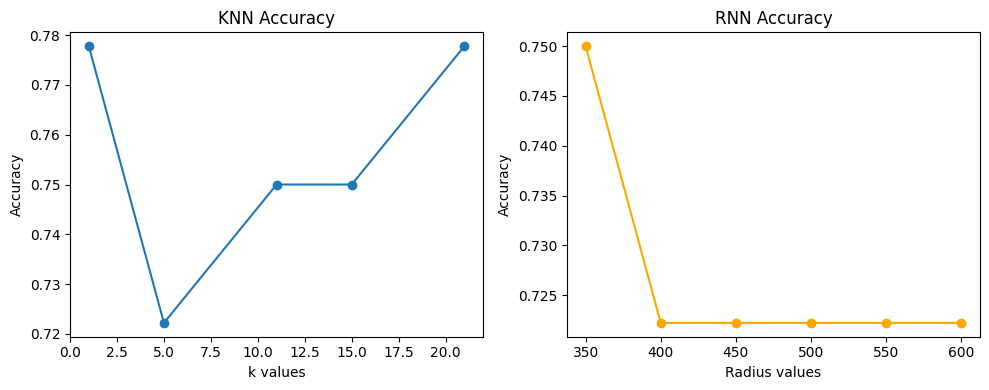

In [4]:
import matplotlib.pyplot as plt  # For plotting graphs

# Create a figure with 2 subplots
plt.figure(figsize=(10, 4))

# Plot KNN accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy')     # Graph title
plt.xlabel('k values')        # X-axis label
plt.ylabel('Accuracy')        # Y-axis label

# Plot RNN accuracy
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange')
plt.title('RNN Accuracy')     # Graph title
plt.xlabel('Radius values')   # X-axis label
plt.ylabel('Accuracy')        # Y-axis label

# Adjust spacing between plots and show
plt.tight_layout()
plt.show()


Comparison and Observations:

From the accuracy trends:
- KNN accuracy changes with different values of k. Too small k (e.g., k=1) may overfit, while larger k can give better generalization.
- RNN accuracy is highly sensitive to radius. Very small or very large radius values may reduce accuracy.

Comparison:
- KNN showed more stable accuracy across k values.
- RNN required careful tuning of radius to achieve good performance.

When to Use:
- KNN is preferable when dataset is dense and we can easily tune k.
- RNN may be better for datasets with irregular spacing between points, but needs proper scaling and parameter selection.
